GOVERNMENT COMBINED

In [3]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
df=pd.read_csv("datasets/combined/government_combined.csv")

In [5]:
# print(df.head())
# print(df.columns)
postInfo = df['post_body_text']
postInfo.head()

0    In response to rising egg prices and ongoing b...
1    The Georgia Department of Agriculture was esta...
2    Georgia Department of Agriculture says residen...
3    Georgia Department of Agriculture says residen...
4    Georgia Department of Agriculture says residen...
Name: post_body_text, dtype: object

In [9]:
import csv  # Import csv module for quoting options
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    if isinstance(text, str):  # Ensure input is a string
        scores = analyzer.polarity_scores(text)
        return scores['compound']
    else:
        return None  # Return None for non-text values

# Read the CSV file with proper quoting to handle commas inside strings
input_csv = 'datasets/combined/government_combined.csv'  # Replace with your input CSV file path
df = pd.read_csv(input_csv, quotechar='"')  # Ensure proper reading of quoted text

# Apply the sentiment analysis to each line in the 'post_body_text' column
df['sentiment'] = df['post_body_text'].apply(get_sentiment_scores)

# Verify the contents of the DataFrame
print(df.head())

# Write the results to a new CSV file with proper quoting for text fields
output_csv = 'datasets/combined/government_combined_output.csv'  # Replace with your desired output CSV file path
df.to_csv(output_csv, index=False, quoting=csv.QUOTE_ALL)  # Correct quoting usage

# Confirm the file was written
print(f"Output file saved to: {output_csv}")

      PostId                                            PostUrl  \
0  458661712        https://www.youtube.com/watch?v=mecIIha_BIk   
1  458681633           https://www.instagram.com/p/DHLUnXlJa3q/   
2  456736042  https://twitter.com/AUG_Chronicle/status/18995...   
3  456562393  https://www.facebook.com/savannahnow/posts/pfb...   
4  456544787  https://twitter.com/SavannahNow/status/1899392...   

   PostEngagement         Platform  ChannelID  \
0             NaN          YouTube    2853188   
1             NaN  InstagramDirect   27205848   
2             NaN          Twitter    6887643   
3             NaN         Facebook   17964257   
4             NaN          Twitter    8100729   

                               ChannelName     ChannelUid     ChannelUrl  \
0                             Farm Monitor  blank_for_now  blank_for_now   
1                          Bethany Ballard  blank_for_now  blank_for_now   
2                        Augusta Chronicle  blank_for_now  blank_for_now  

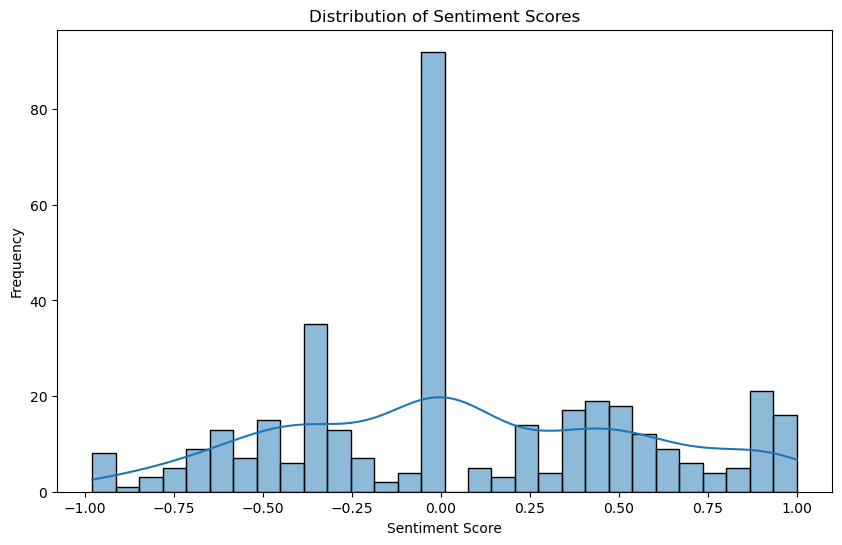

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('datasets/combined/government_combined_output.csv')

# Plotting the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [13]:
#Average overall sentiment score
average_sentiment = df['sentiment'].mean()
print(f"Average Sentiment Score: {average_sentiment}")

Average Sentiment Score: 0.07048579088471849


In [11]:
import pandas as pd

# Read data from CSV file
df = pd.read_csv('datasets/combined/government_combined_output.csv')

# Group by 'Platform' and calculate the average sentiment score for each platform
average_sentiment = df.groupby('Platform')['sentiment'].mean().reset_index()

# Rename columns for clarity
average_sentiment.columns = ['Platform', 'AverageSentimentScore']

print(average_sentiment)


           Platform  AverageSentimentScore
0           Bluesky               0.000000
1          Facebook               0.100905
2    FacebookDirect               0.314668
3             GETTR              -0.521100
4               Gab              -0.070233
5         Instagram               0.130890
6   InstagramDirect               0.174743
7          Telegram              -0.147600
8           Threads               0.021750
9            TikTok               0.406250
10      TruthSocial              -0.585900
11          Twitter              -0.019200
12          YouTube               0.343824
